In [82]:
import rasterio
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString

In [239]:
# read in raster, get bounding box and assign vars
with rasterio.open('clipped_fuji.tif') as rst:
    print(rst.crs)
    bounds = rst.bounds
    
xmin,ymin,xmax,ymax = bounds

EPSG:30177


In [242]:
x_list = []
y_list = []
group = []

# iterate over bounding box area creating point array
# cast bounds as integer, with x interval of 30 and y interval of 120

for count, y in range(int(ymin), int(ymax), 120):
    for x in range(int(xmin), int(xmax), 30):
        x_list.append(x)
        y_list.append(y)

# sample raster values using coords      
with rasterio.open('clipped_fuji.tif') as src:
    z_list = [z[0] for z in src.sample(zip(x_list, y_list))]
    

In [243]:
# create dataframe from lists
df = pd.DataFrame(
    {
        'x_coord': x_list,
        'y_coord': y_list,
        'z_coord': z_list
    })

In [244]:
# create shifted y column
df['shifted_y'] = df.y_coord + df.z_coord

In [250]:
# drop no data value rows
df = df[df.z_coord != df.z_coord.min()]

In [251]:
# create geodataframe using x and shifted y coord values
gdf = gpd.GeoDataFrame(
    df, crs=30177, geometry=gpd.points_from_xy(df.x_coord, df.shifted_y))

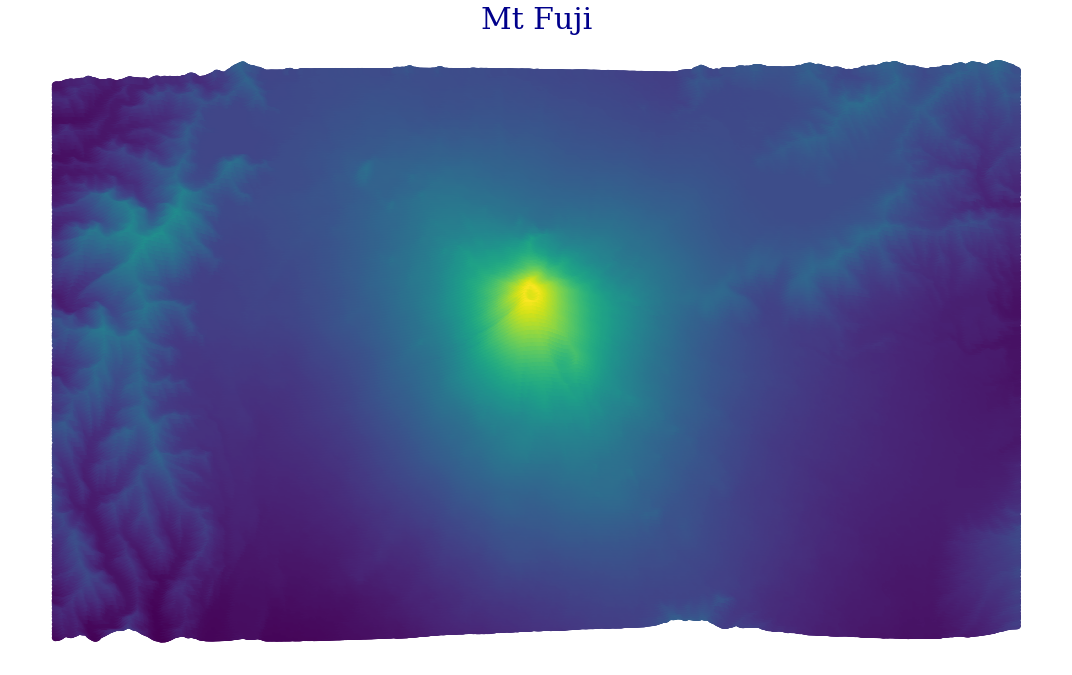

In [254]:
# Point plot - density of points creates illusion of a 3d dem

font = {
    'family': 'serif',
    'color':  'darkblue',
    'weight': 'light',
    'size': 30
}

fig, ax = plt.subplots(figsize=(15,15))
gdf.plot(column='z_coord',
    cmap='viridis',
    ax=ax)

ax.set_title('Mt Fuji', fontdict=font, loc='center')

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [206]:
# Create lines from points by using shapely, grouping by original y_coord

gdf2 = gdf.groupby(['y_coord'])['geometry'].apply(lambda x: LineString(x.tolist()))
gdf2 = gpd.GeoDataFrame(gdf2, crs=30177, geometry='geometry')

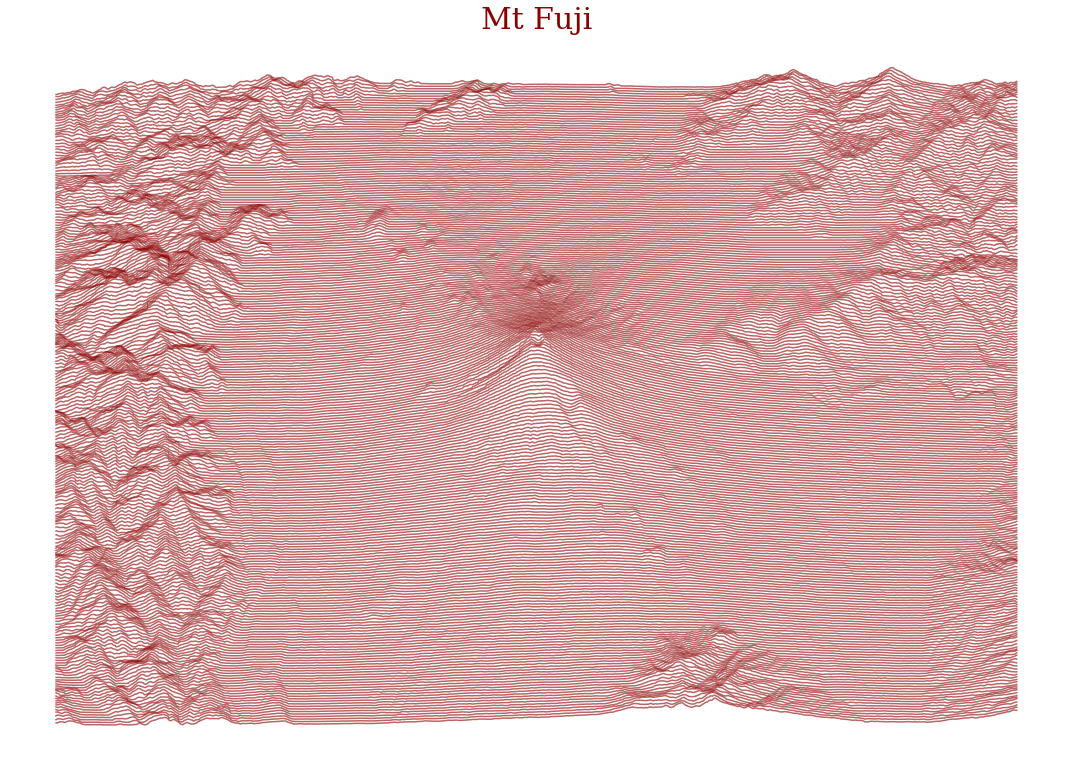

In [229]:
# joyplot of fuji and surrounding area

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'light',
        'size': 30,
        }

fig, ax = plt.subplots(figsize=(15,15))
gdf2.plot(
    color='darkred',
    alpha=0.6, 
    ax=ax)

ax.set_title('Mt Fuji', fontdict=font, loc='center')

ax.set_axis_off()
plt.tight_layout()
plt.show()